# Natural Languege Processsing - Knowledge Graph example

In [4]:
# import warnings
# warnings.filterwarnings('ignore')

## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for text
import wikipediaapi
import nltk
import re

## for nlp
import spacy
from spacy import displacy
import textacy

## for graph
import networkx as nx
import plotly.graph_objs as go
import cairosvg
from PIL import Image
from io import BytesIO
import os

## for timeline
import dateparser

Importamos la data

In [5]:
text_1 = '''
Neo es el elegido de Matrix.
'''

In [6]:
nlp = spacy.load('es_core_news_sm')  # Carga el modelo
# doc = nlp("Apple is looking at buying U.K. startup for $1 billion")  # Procesa el texto
doc = nlp(text_1)

for ent in doc.ents:
    print(ent.text, ent.label_)  # Reconocimiento de entidades

Neo MISC
Matrix MISC


In [7]:
text_2 = "Transformers have shown great potential in computer vision tasks. A common belief is their attention-based token mixer module contributes most to their competence. However, recent works show the attention-based module in transformers can be replaced by spatial MLPs and the resulted models still perform quite well. Based on this observation, we hypothesize that the general architecture of the transformers, instead of the specific token mixer module, is more essential to the model's performance. To verify this, we deliberately replace the attention module in transformers with an embarrassingly simple spatial pooling operator to conduct only the most basic token mixing. Surprisingly, we observe that the derived model, termed as PoolFormer, achieves competitive performance on multiple computer vision tasks. For example, on ImageNet-1K, PoolFormer achieves 82.1% top-1 accuracy, surpassing well-tuned vision transformer/MLP-like baselines DeiT-B/ResMLP-B24 by 0.3%/1.1% accuracy with 35%/52% fewer parameters and 48%/60% fewer MACs. The effectiveness of PoolFormer verifies our hypothesis and urges us to initiate the concept of \"MetaFormer\", a general architecture abstracted from transformers without specifying the token mixer. Based on the extensive experiments, we argue that MetaFormer is the key player in achieving superior results for recent transformer and MLP-like models on vision tasks. This work calls for more future research dedicated to improving MetaFormer instead of focusing on the token mixer modules. Additionally, our proposed PoolFormer could serve as a starting baseline for future MetaFormer architecture design. Code is available at https://github.com/sail-sg/poolformer"

In [6]:
nlp = spacy.load('en_core_web_trf')  # Carga el modelo
# doc = nlp("Apple is looking at buying U.K. startup for $1 billion")  # Procesa el texto
doc = nlp(text_2)

for ent in doc.ents:
    print(ent.text, ent.label_)  # Reconocimiento de entidades

PoolFormer PRODUCT
PoolFormer PRODUCT
82.1% PERCENT
0.3%/1.1% PERCENT
PoolFormer PRODUCT
MetaFormer PRODUCT
MetaFormer PRODUCT
MetaFormer PRODUCT
PoolFormer PRODUCT
MetaFormer PRODUCT


In [1]:
# Establecemos el tema de busqueda.
topic = "Neuroscience"

# Especificamos un user agent para identificar quién está haciendo la solicitud a Wikipedia.
user_agent = "MyUserAgent/1.0 (egoitzaulestia@gmail.com)"

# Creación del Objeto Wikipedia API:
# ----------------------------------
# Instanciamos el objeto de la clase "wikipedia" de la librería "wikipediaapi".
# Esta instancia nos permite realizar búsquedas y obtener datos de Wikipedia.
wiki = wikipediaapi.Wikipedia(user_agent=user_agent)

# Obtenciñon de la Página de Wikipedia:
# -------------------------------------
# Obtenemos la página correspondiente al tema. La función page() busca un tema que coincida
# con el tema proporcionado y devuelve un objeto que representa esa página.
page = wiki.page(topic)

# Extracción del Texto de la Página:
# ----------------------------------
# Extraemos el texto del contenido de la página de Wikipedia. Especificamente, toma el texto 
# 
txt = page.text[:page.text.find("See also")]

print(txt + " ...")

NameError: name 'wikipediaapi' is not defined

In [2]:
'''
Compute n-grams frequency with nltk tokenizer.
:parameter
    :param txt: text
    :param ngrams: int or list - 1 for unigrams, 2 for bigrams, [1,2] for both
    :param top: num - plot the top frequent words
:return
    dtf_count: dtf with word frequency
'''
def word_freq(txt, ngrams=[1,2,3], top=10, figsize=(10,7)):
    lst_tokens = nltk.tokenize.word_tokenize(txt)
    ngrams = [ngrams] if type(ngrams) is int else ngrams
    
    ## calculate
    dtf_freq = pd.DataFrame()
    for n in ngrams:
        dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
        dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
        dtf_n["ngrams"] = n
        dtf_freq = pd.concat([dtf_freq, dtf_n])
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
    dtf_freq = dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=dtf_freq.groupby('ngrams')[["ngrams","freq","word"]].head(top))
    ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    ax.grid(axis="x")
    plt.show()
    return dtf_freq

In [3]:
dtf_freq = word_freq(txt, ngrams=[10], top=30, figsize=(10,7))

NameError: name 'txt' is not defined

In [1]:
d

<module 'click' from '/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/click/__init__.py'>

# **1 - NLP**

### Antes de crear un Grafo de Conocimiento, Lo primero que debemos hacer es encontrar entidades y relaciones.

Hoy en día, la librería más usada para eso es Spacy, una librería open-source para NLP avanzado que se aprovecha de Cython (C+Python). Spacy usa modelos de lenguaje preentrenados para tokenizar el texto y transformaarlo en un objeto comunmente llamado "document", basicamente, una clase que contiene todas las anotaciones predichas por el modelo.

### **Model**

In [9]:
# python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_trf')
doc = nlp(txt)

### **Sentence Segmentation**

In [10]:
lst_docs = [sent for sent in doc.sents]
print("tot sentences:", len(lst_docs))

i = 3
lst_docs[i]

tot sentences: 105


A convolutional neural network layer, in the context of computer vision, can be seen as a GNN applied to graphs whose nodes are pixels and only adjacent pixels are connected by edges in the graph.

### **POS/DEP**

##### **POS** (Part-of-Speech)

De cada oración, vamos a extraer entidades y sus relaciones. Para hacer eso, primero necesitamos entender el  `Part-of-Speech (POS) tagging` (etiquetado de Partes del Discurso), que es el proceso de etiquetar cada palabra en una oración con su etiqueta gramatical apropiada. 

Aquí está la lista completa de etiquetas posibles (hasta el día de hoy):

- **ADJ:** adjetivo, por ejemplo, grande, viejo, verde, incomprensible, primero (ADJ: adjective, e.g. big, old, green, incomprehensible, first)
- **ADP:** adposición (preposición/posposición), por ejemplo, en, hacia, durante (ADP: adposition (preposition/postposition) e.g. in, to, during)
- **ADV:** adverbio, por ejemplo, muy, mañana, abajo, donde, allí (ADV: adverb, e.g. very, tomorrow, down, where, there)
- **AUX:** auxiliar, por ejemplo, es, ha (hecho), hará (hacer), debería (hacer) (AUX: auxiliary, e.g. is, has (done), will (do), should (do))
- **CONJ:** conjunción, por ejemplo, y, o, pero (CONJ: conjunction, e.g. and, or, but)
- **CCONJ:** conjunción coordinante, por ejemplo, y, o, pero (CCONJ: coordinating conjunction, e.g. and, or, but)
- **DET:** determinante, por ejemplo, un, una, el, la (DET: determiner, e.g. a, an, the)
- **INTJ:** interjección, por ejemplo, psst, ay, bravo, hola (INTJ: interjection, e.g. psst, ouch, bravo, hello)
- **NOUN:** sustantivo, por ejemplo, niña, gato, árbol, aire, belleza (NOUN: noun, e.g. girl, cat, tree, air, beauty)
- **NUM:** numeral, por ejemplo, 1, 2017, uno, setenta y siete, IV, MMXIV (NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV)
- **PART:** partícula, por ejemplo, ‘s, no (PART: particle, e.g. ‘s, not)
- **PRON:** pronombre, por ejemplo, yo, tú, él, ella, mí mismo, ellos mismos, alguien (PRON: pronoun, e.g I, you, he, she, myself, themselves, somebody)
- **PROPN:** nombre propio, por ejemplo, María, Juan, Londres, OTAN, HBO (PROPN: proper noun, e.g. Mary, John, London, NATO, HBO)
- **PUNCT:** puntuación, por ejemplo, ., (, ), ? (PUNCT: punctuation, e.g. ., (, ), ?)
- **SCONJ:** conjunción subordinante, por ejemplo, si, mientras, que (SCONJ: subordinating conjunction, e.g. if, while, that)
- **SYM:** símbolo, por ejemplo, $, %, §, ©, +, −, ×, ÷, =, :), emojis (SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :), emojis)
- **VERB:** verbo, por ejemplo, correr, corre, corriendo, comer, comió, comiendo (VERB: verb, e.g. run, runs, running, eat, ate, eating)
- **X:** otro, por ejemplo, sfpksdpsxmsa (X: other, e.g. sfpksdpsxmsa)
- **SPACE:** espacio, por ejemplo, (SPACE: space, e.g. )







##### **DEP** (Dependency parsing)

El etiquetado POS por sí solo no es suficiente, el modelo también intenta comprender la realción entre pares de palabras. Esta tarea se llama `Dependency (DEP) parsing`, análisis de dependecias.

Aquí está la lista completa de etiquetas posibles (hasta el día de hoy):

- **ACL:** modificador clausal de sustantivo (ACL: clausal modifier of noun)
- **ACOMP:** complemento adjetival (ACOMP: adjectival complement)
- **ADVCL:** modificador de cláusula adverbial (ADVCL: adverbial clause modifier)
- **ADVMOD:** modificador adverbial (ADVMOD: adverbial modifier)
- **AGENT:** agente (AGENT: agent)
- **AMOD:** modificador adjetival (AMOD: adjectival modifier)
- **APPOS:** modificador de aposición (APPOS: appositional modifier)
- **ATTR:** atributo (ATTR: attribute)
- **AUX:** auxiliar (AUX: auxiliary)
- **AUXPASS:** auxiliar (pasivo) (AUXPASS: auxiliary (passive))
- **CASE:** marcador de caso (CASE: case marker)
- **CC:** conjunción coordinante (CC: coordinating conjunction)
- **CCOMP:** complemento clausal (CCOMP: clausal complement)
- **COMPOUND:** modificador compuesto (COMPOUND: compound modifier)
- **CONJ:** conjunción (CONJ: conjunct)
- **CSUBJ:** sujeto clausal (CSUBJ: clausal subject)
- **CSUBJPASS:** sujeto clausal (pasivo) (CSUBJPASS: clausal subject (passive))
- **DATIVE:** dativo (DATIVE: dative)
- **DEP:** dependiente no clasificado (DEP: unclassified dependent)
- **DET:** determinante (DET: determiner)
- **DOBJ:** objeto directo (DOBJ: direct object)
- **EXPL:** expletivo (EXPL: expletive)
- **INTJ:** interjección (INTJ: interjection)
- **MARK:** marcador (MARK: marker)
- **META:** modificador meta (META: meta modifier)
- **NEG:** modificador de negación (NEG: negation modifier)
- **NOUNMOD:** modificador de nominal (NOUNMOD: modifier of nominal)
- **NPMOD:** modificador de frase nominal como adverbial (NPMOD: noun phrase as adverbial modifier)
- **NSUBJ:** sujeto nominal (NSUBJ: nominal subject)
- **NSUBJPASS:** sujeto nominal (pasivo) (NSUBJPASS: nominal subject (passive))
- **NUMMOD:** modificador numérico (NUMMOD: number modifier)
- **OPRD:** predicado de objeto (OPRD: object predicate)
- **PARATAXIS:** parataxis (PARATAXIS: parataxis)
- **PCOMP:** complemento de preposición (PCOMP: complement of preposition)
- **POBJ:** objeto de preposición (POBJ: object of preposition)
- **POSS:** modificador de posesión (POSS: possession modifier)
- **PRECONJ:** conjunción pre-correlativa (PRECONJ: pre-correlative conjunction)
- **PREDET:** pre-determinante (PREDET: pre-determiner)
- **PREP:** modificador preposicional (PREP: prepositional modifier)
- **PRT:** partícula (PRT: particle)
- **PUNCT:** puntuación (PUNCT: punctuation)
- **QUANTMOD:** modificador de cuantificador (QUANTMOD: modifier of quantifier)
- **RELCL:** modificador de cláusula relativa (RELCL: relative clause modifier)
- **ROOT:** raíz (ROOT: root)
- **XCOMP:** complemento clausal abierto (XCOMP: open clausal complement)







In [11]:
# Escogemos una frase
i = 3
lst_docs[i]

A convolutional neural network layer, in the context of computer vision, can be seen as a GNN applied to graphs whose nodes are pixels and only adjacent pixels are connected by edges in the graph.

In [12]:
# for i in lst_docs:
    # print(i)

In [13]:
for token in lst_docs[i]:
    print(token.text, "-->", "pos: " + token.pos_, "|", "dep: " + token.dep_,"")

A --> pos: DET | dep: det 
convolutional --> pos: ADJ | dep: amod 
neural --> pos: ADJ | dep: amod 
network --> pos: NOUN | dep: compound 
layer --> pos: NOUN | dep: nsubjpass 
, --> pos: PUNCT | dep: punct 
in --> pos: ADP | dep: prep 
the --> pos: DET | dep: det 
context --> pos: NOUN | dep: pobj 
of --> pos: ADP | dep: prep 
computer --> pos: NOUN | dep: compound 
vision --> pos: NOUN | dep: pobj 
, --> pos: PUNCT | dep: punct 
can --> pos: AUX | dep: aux 
be --> pos: AUX | dep: auxpass 
seen --> pos: VERB | dep: ROOT 
as --> pos: ADP | dep: prep 
a --> pos: DET | dep: det 
GNN --> pos: NOUN | dep: pobj 
applied --> pos: VERB | dep: acl 
to --> pos: ADP | dep: prep 
graphs --> pos: NOUN | dep: pobj 
whose --> pos: DET | dep: poss 
nodes --> pos: NOUN | dep: nsubj 
are --> pos: AUX | dep: relcl 
pixels --> pos: NOUN | dep: attr 
and --> pos: CCONJ | dep: cc 
only --> pos: ADV | dep: advmod 
adjacent --> pos: ADJ | dep: amod 
pixels --> pos: NOUN | dep: nsubjpass 
are --> pos: AUX | d

SpaCy provee una herrramienta de visualización

In [14]:
from spacy import displacy

displacy.render(lst_docs[i], style="dep", options={"distance": 100})

In [15]:
from spacy import displacy
import cairosvg
import os
import re

# Suponiendo que lst_docs[i] es tu documento procesado por SpaCy
# Genera el gráfico de dependencias como SVG
svg = displacy.render(lst_docs[i], style="dep", options={"distance": 100}, jupyter=False)

# Verifica si ya existe un atributo de estilo en la etiqueta <svg>
if 'style="' in svg:
    # Añade el fondo blanco al estilo existente
    svg_with_background = re.sub(r'style="', 'style="background: white; ', svg, count=1)
else:
    # Añade un atributo de estilo con fondo blanco
    svg_with_background = svg.replace('<svg', '<svg style="background: white;"', 1)

# Guarda el SVG temporalmente con fondo blanco
with open("temp.svg", "w", encoding="utf-8") as file:
    file.write(svg_with_background)

# Convierte el SVG a PNG
cairosvg.svg2png(url='temp.svg', write_to='dependency_graph2.png')

# Elimina el archivo SVG temporal
os.remove("temp.svg")

1. El token más importante es el vervo (POS=VERB) porque es la raíz (DEP=ROOT) 

2. Las partículas auxiliares, como los adverbios y adposiciones (POS=ADV/ADP), a menudo se enlazan al verbo como modificadores (DEP=*mod), ya que pueden modificar el significado del verbo. Por ejemplo, "viajar a" y "viajar desde" tienen diferentes significados, aunque la raíz sea la misma ("viajar").

3. Entre las palbras vinculadas al verbo, debe haber algunos sustantivos (POS=PROPN/NOUN) que funcionen como sujeto y objeto (DEP=nsubj/*obj) de la oración.

4. Los sustantivos (nombres) a menudo están cerca de un adjetivo (POS=ADJ) que actúa como un modificador de su significado (DEP=amod). Por ejemplo, en "buena persona" y "mala persona", los adjetivos otorgan significados opuestos al sustantivo "persona".

---

### Named Entity Recognition (NER)

Otra tarea interesante realizada por SpaCy es el Named Entity Recognition (NER), Reconocimiento de Entidades Nombradas. Una entidad es un "real-world object" u "objeto del mundo real" (es decir, persona, país, producto, fecha) y los modelos pueden reconocer varios tipos en un documento. Aquí está la lista completa de etiquetas posibles (hasta el día de hoy):

- **PERSON:** personas, incluyendo ficticias (PERSON: people, including fictional).
- **NORP:** nacionalidades o grupos religiosos o políticos (NORP: nationalities or religious or political groups).
- **FAC:** edificios, aeropuertos, autopistas, puentes, etc. (FAC: buildings, airports, highways, bridges, etc.).
- **ORG:** compañías, agencias, instituciones, etc. (ORG: companies, agencies, institutions, etc.).
- **GPE:** países, ciudades, estados (GPE: countries, cities, states).
- **LOC:** ubicaciones que no son GPE, cadenas montañosas, cuerpos de agua (LOC: non-GPE locations, mountain ranges, bodies of water).
- **PRODUCT:** objetos, vehículos, alimentos, etc. (No servicios) (PRODUCT: objects, vehicles, foods, etc. (Not services)).
- **EVENT:** huracanes nombrados, batallas, guerras, eventos deportivos, etc. (EVENT: named hurricanes, battles, wars, sports events, etc.).
- **WORK_OF_ART:** títulos de libros, canciones, etc. (WORK_OF_ART: titles of books, songs, etc.).
- **LAW:** documentos nombrados convertidos en leyes (LAW: named documents made into laws).
- **LANGUAGE:** cualquier idioma nombrado (LANGUAGE: any named language).
- **DATE:** fechas absolutas o relativas o períodos (DATE: absolute or relative dates or periods).
- **TIME:** tiempos menores que un día (TIME: times smaller than a day).
- **PERCENT:** porcentaje, incluyendo “%” (PERCENT: percentage, including “%”).
- **MONEY:** valores monetarios, incluyendo la unidad (MONEY: monetary values, including unit).
- **QUANTITY:** mediciones, como de peso o distancia (QUANTITY: measurements, as of weight or distance).
- **ORDINAL:** “primero”, “segundo”, etc. (ORDINAL: “first”, “second”, etc.).
- **CARDINAL:** numerales que no caen bajo otro tipo (CARDINAL: numerals that do not fall under another type).

Una manera de Reconocimiento de Entidades Nombradas, Near Entity Recognition (NER) es la siguiente:

In [20]:
for tag in lst_docs[i].ents:
    print(tag.text, f"({tag.label_})")

Tambien podemos visualizar el Reconocimiento de Entidades Nombradas, Near Entity Recognition (NER).

In [17]:
displacy.render(lst_docs, style="ent")

/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


**Esto es útil en caso de que queramos añadir varios atributos a nuestro Grafo de Conocimiento.**


In [77]:
n = 10
for i in range(len(lst_docs[n])):
    displacy.render(lst_docs[i], style="ent")

/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


---

Utilizando las etiquetas predichas por el modelo de NLP, podemos extraer entidades y sus relaciones.

Extracción de Entidades y Relaciones / Entity & Relation Extraction:

La idea es muy simple, pero la implementación puede ser algo complicada. Para cada oración, vamos a extraer el sujeto y el objeto junto con sus modificadores, palabras compuestas y signos de puntuación entre ellos.

Esto puede llevarse a cabo de dos maneras:

1. Manualmente: Podemos empezar desde la base del código, que probablemente deba ser modificado y adaptado a tu dataset/caso de uso específico.

In [23]:
def extract_entities(doc):
    a, b, prev_dep, prev_txt, prefix, modifier = "", "", "", "", "", ""
    for token in doc:
        if token.dep_ != "punct":
            # prefix --> prev_compound + compound
            if token.dep_ == "compound":
                prefix = prev_txt + " " + token.text if prev_dep == "compound" else token.text
                # if prev_dep == "compoud":
                #     prefix = prev_txt + " " + token.text
                # else:
                #     prefix = token.text

            # modifier --> prev_compound + %mod
            if token.dep_.endswith("mod") == True:
                modifier = prev_txt + " " + token.text if prev_dep == "compound" else token.text
            
            # subject --> modifier + prefix + %subj 
            if token.dep_.find("subj") == True:
                a = modifier + " " + prefix + " " + token.text
                prefix, modifier, prev_dep, prev_txt = "", "", "", ""

            # if object --> modifier + prefix + %obj
            if token.dep_.find("obj") == True:
                b = modifier + " " + prefix + " " + token.text

            prev_dep, prev_txt = token.dep_, token.text

    # Clean
    a = " ".join([i for i in a.split()])
    b = " ".join([i for i in b.split()])
    return (a.strip(), b.strip())


# La extración de relaciones requiere de la herramienta de coincidencia basada en reglas ("rule-based matching"),
#  una versión mejorada de las expresiones regulares texto en sin formato (raw text) 
# def extract_relation(doc, nlp):
#     matcher = spacy.matcher.Matcher(nlp.vocab)
#     p1 = [{'DEP':'ROOT'},
#           {'DEP':'prep', 'OP':"?"},
#           {'DEP':'agent', 'OP':'?'},
#           {'POS':'ADJ', 'OP':"?"}]
#     matcher.add(key="matching_1", patterns=[p1])
#     matches = matcher(doc)
#     k = len(matches) - 1
#     span = doc[matches[k][1]:matches[k][2]]
#     return span.text

def extract_relation(doc, nlp):
    matcher = spacy.matcher.Matcher(nlp.vocab)
    p1 = [{'DEP':'ROOT'},
          {'DEP':'prep', 'OP':"?"},
          {'DEP':'agent', 'OP':'?'},
          {'POS':'ADJ', 'OP':"?"}]
    matcher.add(key="matching_1", patterns=[p1])
    matches = matcher(doc)

    # Verifica si hay coincidencias antes de acceder a ellas
    if len(matches) > 0:
        k = len(matches) - 1
        span = doc[matches[k][1]:matches[k][2]]
        return span.text
    else:
        return ""  # O algún valor por defecto que indique la ausencia de coincidencias

Probemos en este conjunto de datos y revisemos el ejemplo habitual:

In [24]:
# Extraemos entidades
lst_entities = [extract_entities(i) for i in lst_docs]

i = 3
# ejemplo
lst_entities[i]

('adjacent pixels', 'graph')

In [25]:
# Extraemos relaciones
lst_relations = [extract_relation(i, nlp) for i in lst_docs]

# example
lst_relations[i]

'seen as'

In [26]:
# extraer atributos (NER)
lst_attr = []
for x in lst_docs:
    attr = ""
    for tag in x.ents:
        attr = attr+tag.text if tag.label_ == "DATE" else attr + ""
    lst_attr.append(attr)

# Ejemplo
lst_attr[i]

''

2. Alternativamente, podemos usar `Textacy`, una biblioteca construida sobre SpaCy para extender sus funcionalidades principales. Esto es mucho más amigable para el usuario y, en general, más preciso.

In [27]:
# Extraemos entidades y relaciones (con textacy)
dic = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n,sentence in enumerate(lst_docs):
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))  
    for sent in lst_generators:
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["entity"].append(subj)
        dic["object"].append(obj)
        dic["relation"].append(relation)


# Creamos DataFrame
dtf = pd.DataFrame(dic)

# ejemplo
dtf[dtf["id"]==i]

,id,text,entity,relation,object
0,3,"A convolutional neural network layer, in the c...",pixels,are_connected,edges


In [28]:
print(lst_docs[i])

A convolutional neural network layer, in the context of computer vision, can be seen as a GNN applied to graphs whose nodes are pixels and only adjacent pixels are connected by edges in the graph.


---

#### Vamos a extraer también los atributos utilizando etiquetas NER (Name Entity Recognition), Reconocimiento de Entidades Nombradas, (por ejemplo, fechas):

In [29]:
# Extraer atributos
attribute = "PERSON"
dic = {"id":[], "text":[], attribute:[]}

for n, sentence in enumerate(lst_docs):
    lst = list(textacy.extract.entities(sentence, include_types={attribute}))
    if len(lst) > 0:
        for attr in lst:
            dic["id"].append(n)
            dic["text"].append(sentence.text)
            dic[attribute].append(str(attr))
    else:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic[attribute].append(np.nan)

dtf_att = pd.DataFrame(dic)
dtf_att = dtf_att[~dtf_att[attribute].isna()]

# Ejemplo
dtf_att[dtf_att["id"] == i]

,id,text,PERSON


Ahora aque hemos extraido el conocimiento, podemos extraer el grafo.

---

### Network Graph (Red de Grafo)

La librería estandar para crea y manipular redes de grafos es `NetworkX`. Podemos crear el grafo empezando por el conjunto de datos entero, pero si hay demasiados nodos, la viusoalización será confusa.

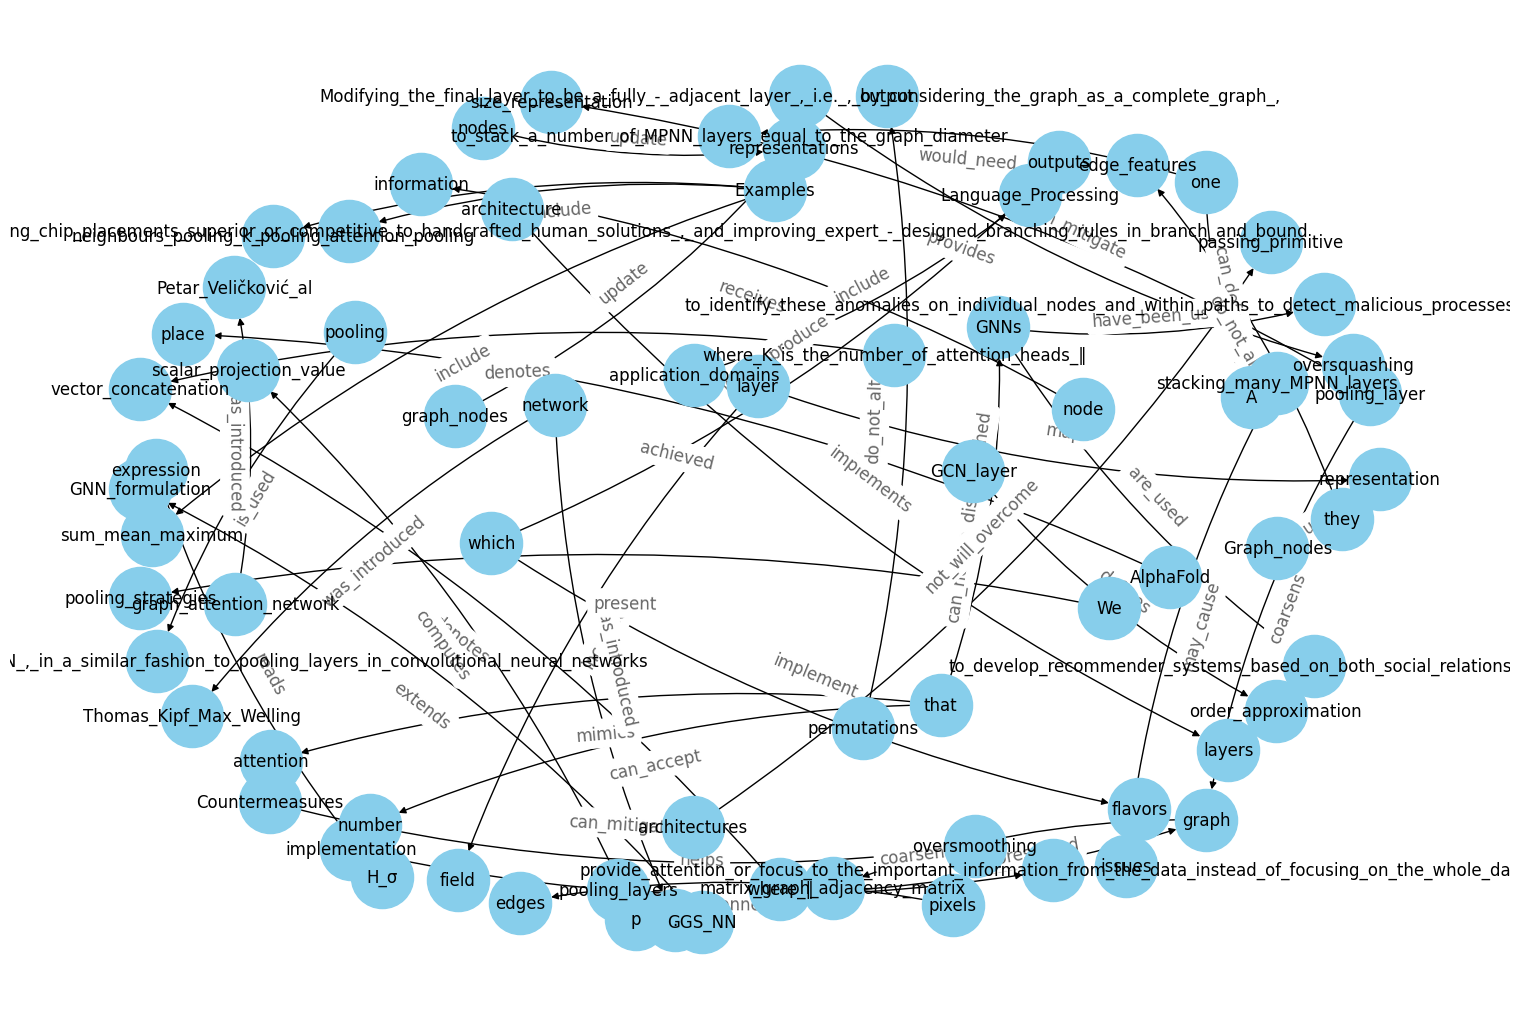

In [31]:
# Crear grafo entero
G = nx.from_pandas_edgelist(dtf, source="entity", target="object",
                            edge_attr="relation",
                            create_using=nx.DiGraph())

# Plot/Graficar
plt.figure(figsize=(15,10))

pos = nx.spring_layout(G, k=1)
node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color,
        edge_color=edge_color, cmap=plt.cm.Dark2,
        node_size=2000, connectionstyle="arc3,rad=0.1")

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5,
                             edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
plt.show()

El Grafo de Conocimiento (Knowledge Graph) hace posible ver cómo todo está relacionado si miramos la imagen a escala grande. Pero así es bastante inservible. Así que es mejor si aplicamos algunos filtros en relación a la información que estamos buscando. Para este ejemplo, podríamos coger solo el nodo involucrado en la entidad más frecuente (básicamente el nodo más conectado):

In [32]:
dtf["entity"].value_counts().head()

entity
Examples    3
that        3
GNNs        2
which       2
network     2
Name: count, dtype: int64

In [33]:
dtf['text'][5]

'Permutation equivariant: a permutation equivariant layer maps a representation of a graph into an updated representation of the same graph.'

In [34]:
dtf.head(50)

,id,text,entity,relation,object
0,3,"A convolutional neural network layer, in the c...",pixels,are_connected,edges
1,6,The key design element of GNNs is the use of p...,graph_nodes,update,representations
2,7,"Since their inception, several different GNN a...",which,implement,flavors
3,9,Relevant application domains for GNNs include ...,application_domains,include,Language_Processing
4,11,\n\nArchitecture\nThe architecture of a generi...,architecture,implements,layers
5,13,Permutation equivariant: a permutation equivar...,layer,maps,representation
6,15,"Intuitively, in a message passing layer, nodes...",nodes,update,representations
7,16,"As such, each message passing layer increases ...",layer,increases,field
8,19,a local pooling layer coarsens the graph via d...,pooling_layer,coarsens,graph
9,20,Local pooling is used to increase the receptiv...,pooling,is_used,"to_increase_the_receptive_field_of_a_GNN_,_in_..."


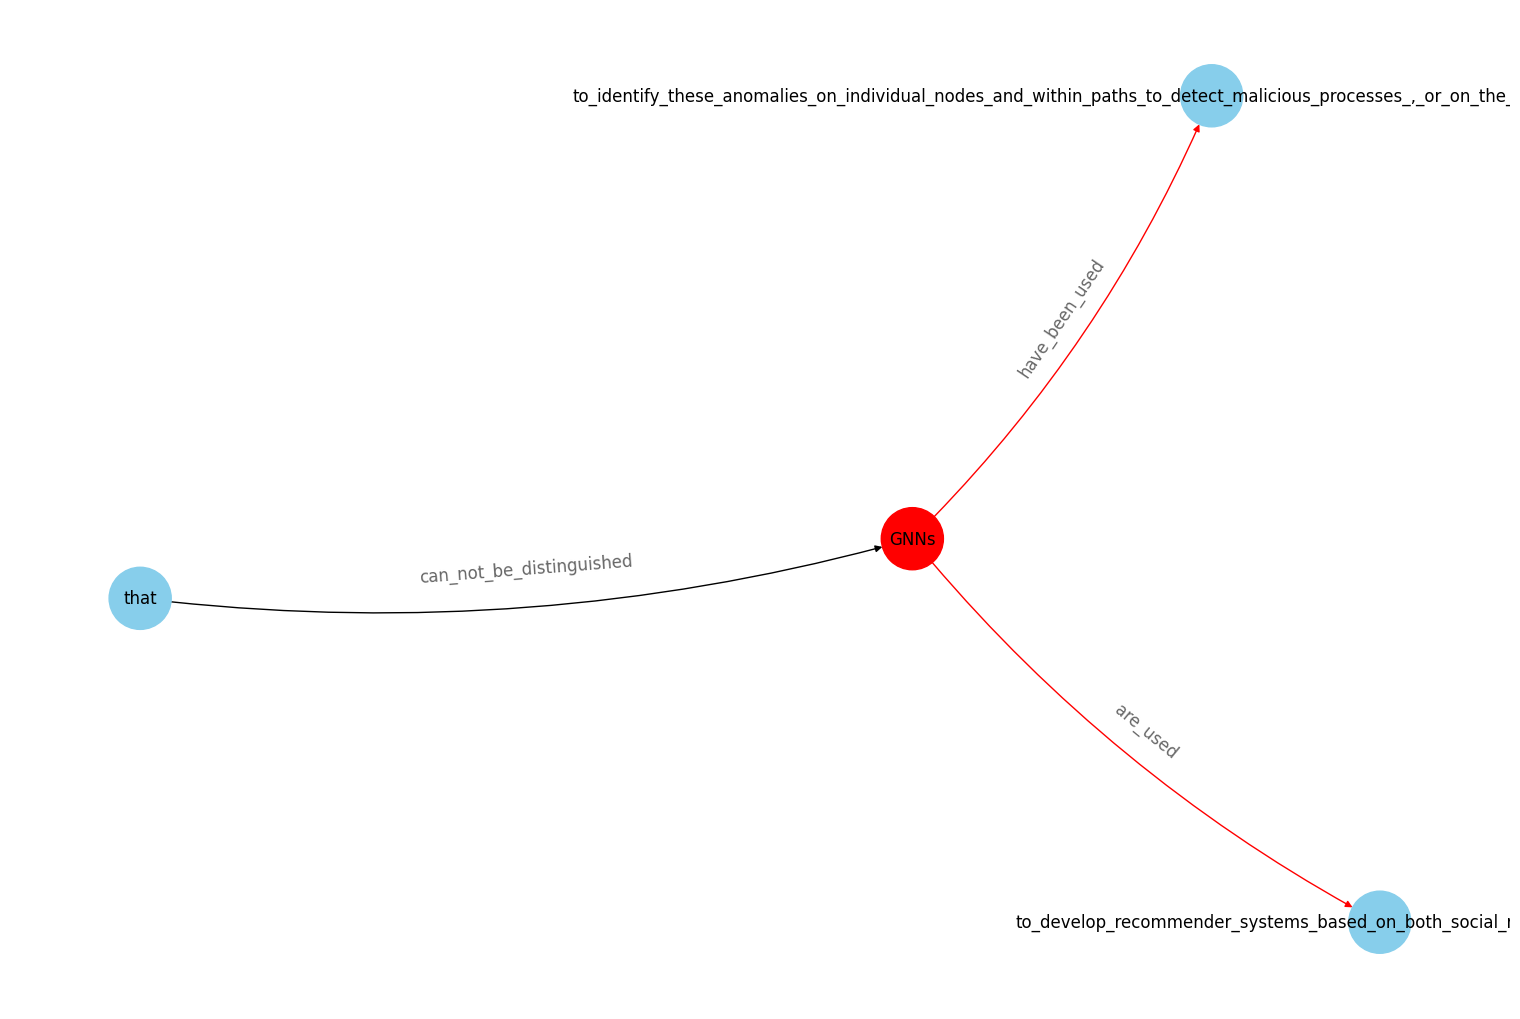

In [48]:
# Filtro
f = "GNNs"
tmp = dtf[(dtf["entity"]==f) | (dtf["object"]==f)]

# Cremaos un grafo pequeño
G = nx.from_pandas_edgelist(tmp, source="entity", target="object", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())

# plot
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                        edge_labels=nx.get_edge_attributes(G,'relation'),
                        font_size=12, font_color='black', alpha=0.6)
plt.show()

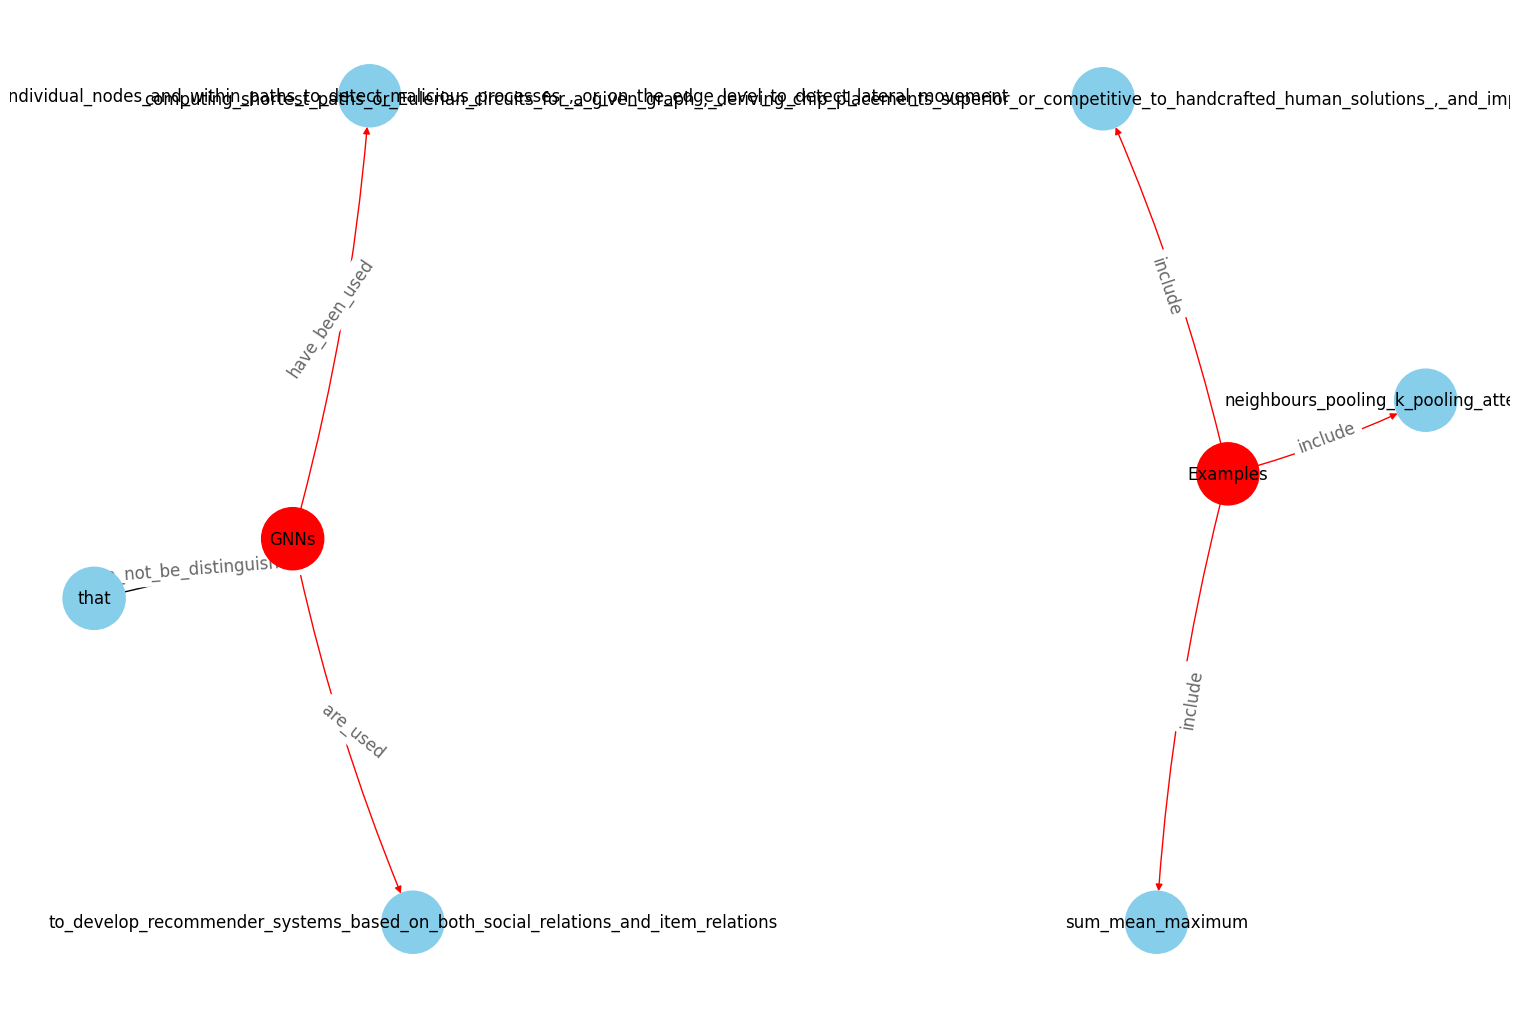

In [49]:
# Filtro
f = "GNNs"
tmp = dtf[(dtf["entity"]==f) | (dtf["object"]==f)]

# Cremaos un grafo pequeño
G = nx.from_pandas_edgelist(tmp, source="entity", target="object", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())
# Filtro
f2 = "Examples"
tmp2 = dtf[(dtf["entity"]==f2) | (dtf["object"]==f2)]

# Cremaos un grafo pequeño
G2 = nx.from_pandas_edgelist(tmp2, source="entity", target="object", 
                            edge_attr="relation", 
                            create_using=nx.DiGraph())
# plot
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.05')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                        edge_labels=nx.get_edge_attributes(G,'relation'),
                        font_size=12, font_color='black', alpha=0.6)

pos2 = nx.nx_agraph.graphviz_layout(G2, prog="neato")
node_color2 = ["red" if node==f2 else "skyblue" for node in G2.nodes]
edge_color2 = ["red" if edge[0]==f2 else "black" for edge in G2.edges]

nx.draw(G2, pos=pos2, with_labels=True, node_color=node_color2, 
        edge_color=edge_color2, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.05')

nx.draw_networkx_edge_labels(G2, pos=pos2, label_pos=0.5, 
                        edge_labels=nx.get_edge_attributes(G2,'relation'),
                        font_size=12, font_color='black', alpha=0.6)

plt.show()

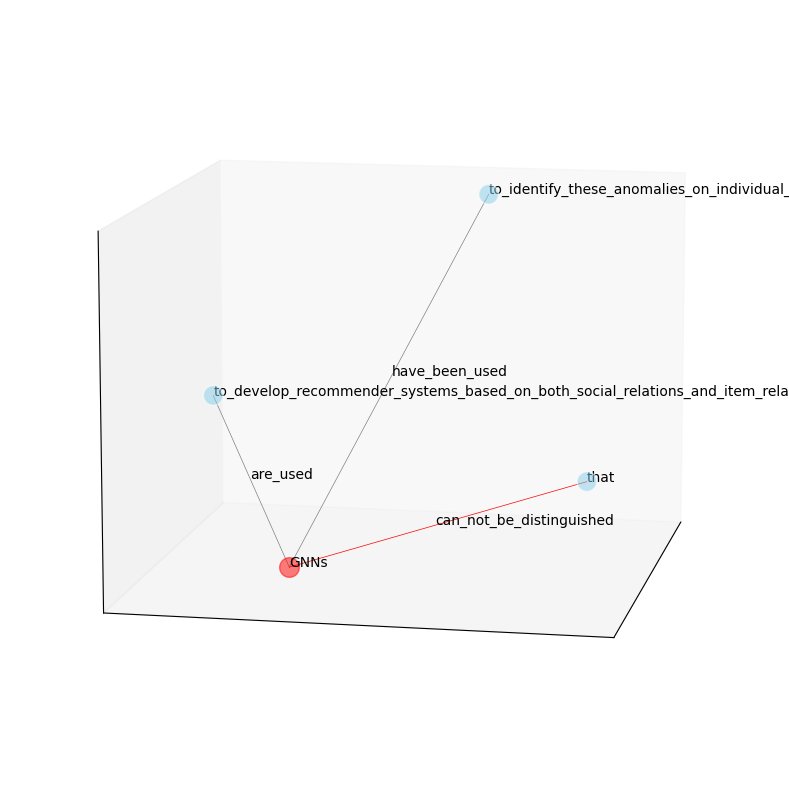

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3d")
pos = nx.spring_layout(G, k=2.5, dim=3)

nodes = np.array([pos[v] for v in sorted(G) if v!=f])
center_node = np.array([pos[v] for v in sorted(G) if v==f])

edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v!=f])
center_edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v==f])

ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

for link in edges:
    ax.plot(*link.T, color="grey", lw=0.5)
for link in center_edges:
    ax.plot(*link.T, color="red", lw=0.5)
    
for v in sorted(G):
    ax.text(*pos[v].T, s=v)
for u,v in G.edges():
    attr = nx.get_edge_attributes(G, "relation")[(u,v)]
    ax.text(*((pos[u]+pos[v])/2).T, s=attr)

ax.set(xlabel=None, ylabel=None, zlabel=None, 
       xticklabels=[], yticklabels=[], zticklabels=[])
ax.grid(False)
for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
    dim.set_ticks([])
ax.view_init(elev=11, azim=11)  # Ajusta estos valores según sea necesario

plt.show()

Es importante decir que aunque un grafo pueda ser útil y agradable de contemplar, una de las partes más importantes del Grafo de Conocimiento en el "cononimiento" (procesamineto de texto), así después los datos pueden ser visualizados en un dataframe, un grafo, o una gráfica distinta. Por ejemplo, podría utilizar las fechas reconocidas con NER, Named Entity Recognition (Reconocimiento de Entidades Nombradas) para construir un gráfico de línea de timepo. 

---

### Gráfico de Linea de Tiempo

Antes que nada, debemos transformar las cadenas de texto o strings como "date" (fecha) a un formato "datetime". La librería `DateParser` analiza sintáticamente fechas en practicamente cualquier tipo de formato string comunmente encontrada en las páginas webs.

In [ ]:
def utils_parsetime(txt):
    x = re.match(r'.=([1-3][0-9]{3})', txt)
    if x is not None:
        try:
            dt = dateparser.parse(txt)
        except:
            dt = np.nan
    else:
        dt = np.nan
    return dt

In [ ]:
print(dtf_att.columns)

Index(['id', 'text', 'DATE'], dtype='object')


Apliquémoslo a los atributos del dataframe:

In [ ]:
dtf_att["dt"] = dtf_att["DATE"].apply(lambda x: utils_parsetime(x))

# Ejemplo
dtf_att[dtf_att["id"]==i]

,id,text,DATE,dt
3,3,The organization was founded in December 2015 ...,December 2015,NaN


In [ ]:
def utils_parsetime(txt):
    x = re.search(r'([1-3][0-9]{3})', txt)
    if x is not None:
        try:
            dt = dateparser.parse(x.group())
        except Exception as e:
            print(f"Error parsing date: {e}")
            dt = np.nan
    else:
        dt = np.nan
    return dt

# Aplica la función
dtf_att["dt"] = dtf_att["DATE"].apply(lambda x: utils_parsetime(x))

# Ejemplo
dtf_att[dtf_att["id"]==i]

,id,text,DATE,dt
3,3,The organization was founded in December 2015 ...,December 2015,2015-11-30


Ahora, deberíamos juntarlo al dataframe principal de entidades-relaciones:

In [ ]:
tmp = dtf.copy()
tmp["y"] = tmp["entity"]+" "+tmp["relation"]+" "+tmp["object"]

dtf_att = dtf_att.merge(tmp[["id","y"]], how="left", on="id")
dtf_att = dtf_att[~dtf_att["y"].isna()].sort_values("dt", 
                 ascending=True).drop_duplicates("y", keep='first')
dtf_att.head()

MergeError: Passing 'suffixes' which cause duplicate columns {'y_x'} is not allowed.

In [ ]:
dtf_att.shape

(72, 5)

Finalmente, podemos graficar la linea de tiempo. Como ya sabemos, graficar la linea de tiempo entera no sera útil

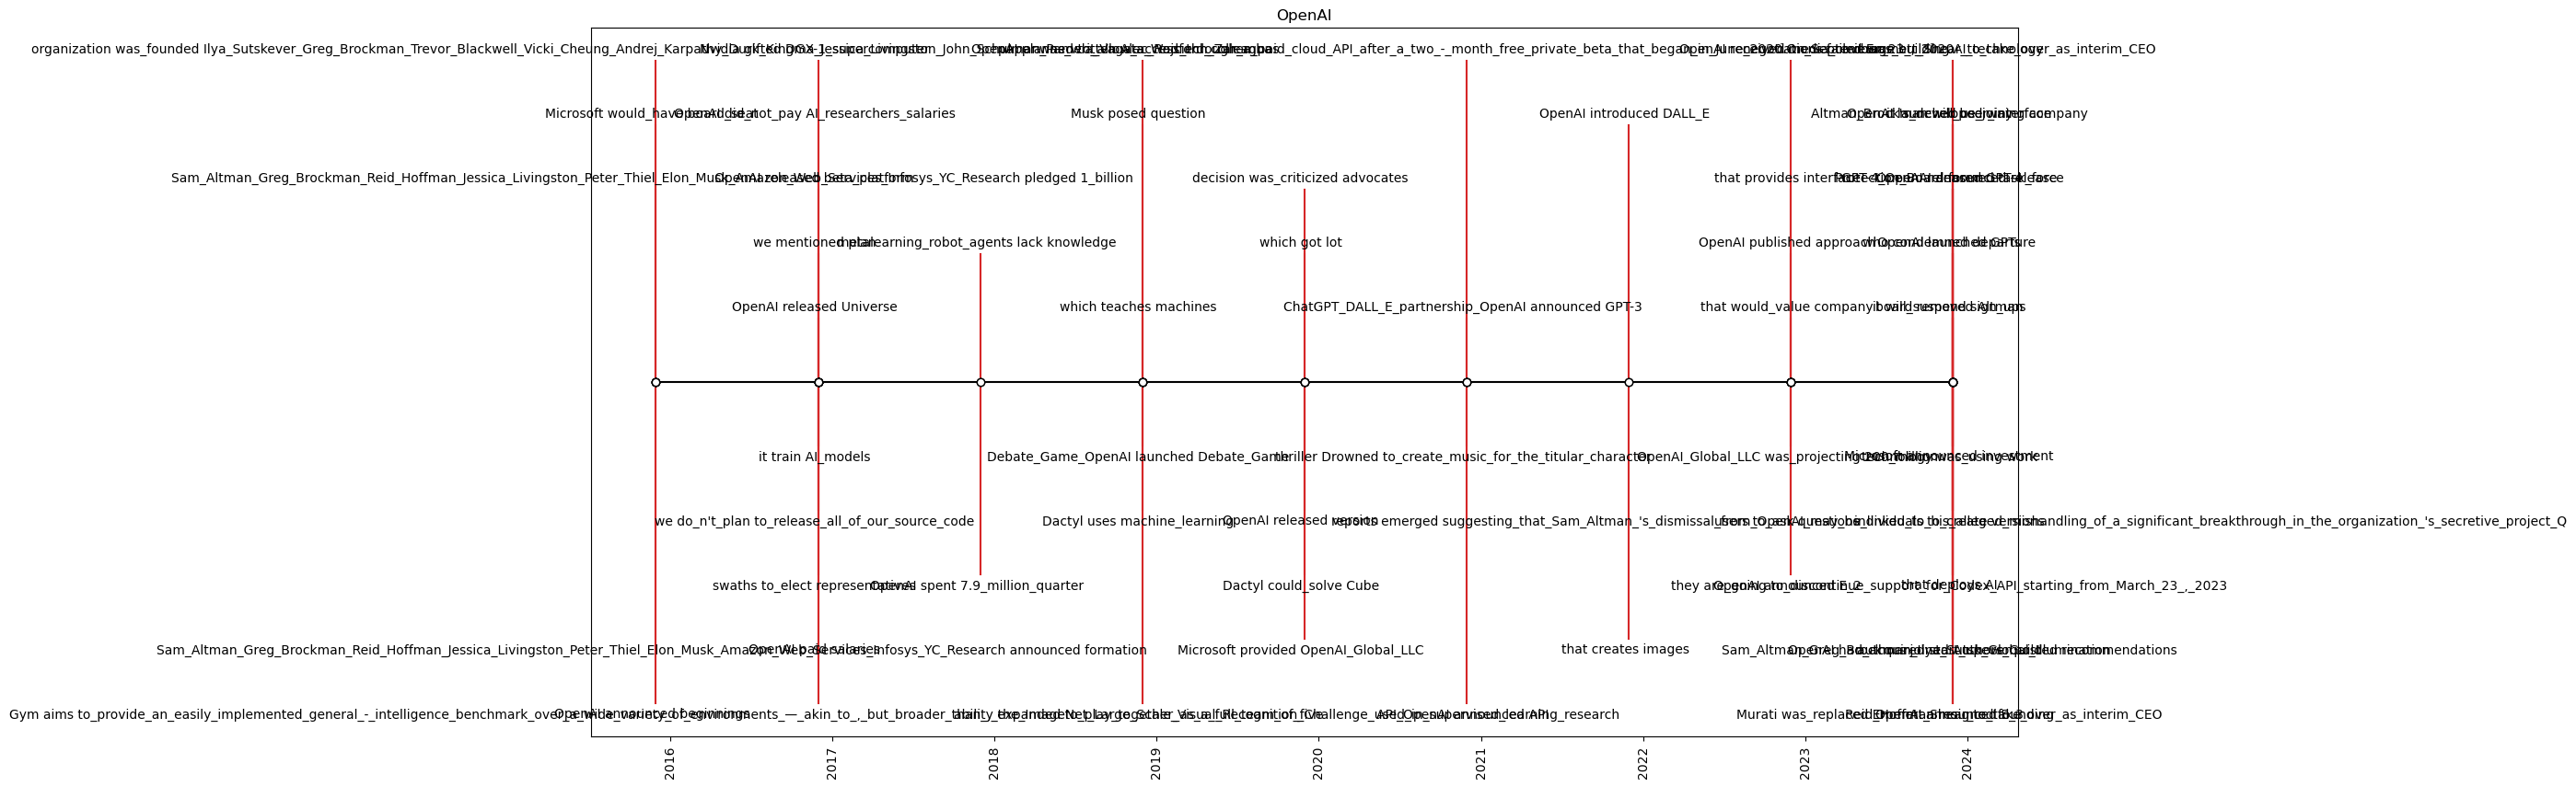

In [ ]:
dates = dtf_att["dt"].values
names = dtf_att["y"].values
l = [10,-10, 8,-8, 6,-6, 4,-4, 2,-2]
levels = np.tile(l, int(np.ceil(len(dates)/len(l))))[:len(dates)]

fig, ax = plt.subplots(figsize=(20,10))
ax.set(title=topic, yticks=[], yticklabels=[])

ax.vlines(dates, ymin=0, ymax=levels, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")

for d,l,r in zip(dates,levels,names):
    ax.annotate(r, xy=(d,l), xytext=(-3, np.sign(l)*3), 
                textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l>0 else "top")

plt.xticks(rotation=90) 
plt.show()

Así que es preferible filtrar un periodo de tiempo específico:

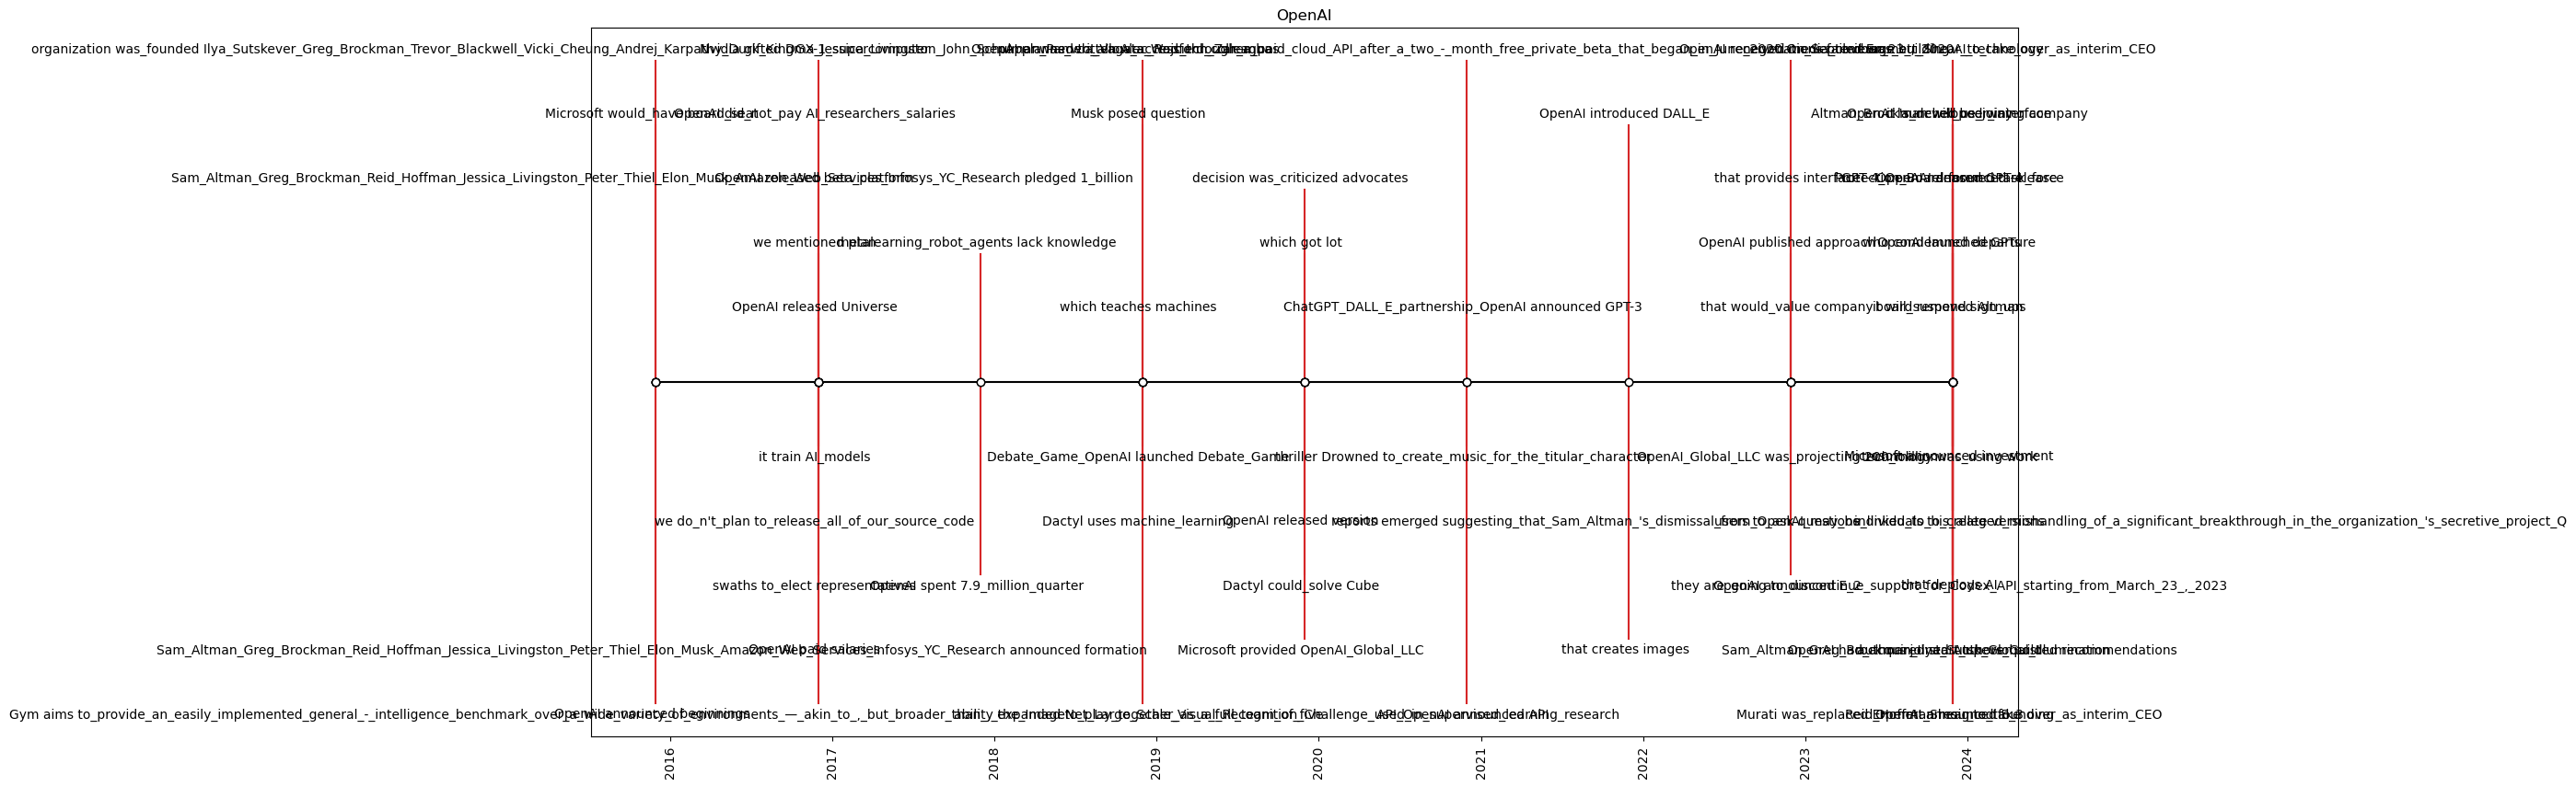

In [ ]:
yyyy = "2015"
dates = dtf_att[dtf_att["dt"]>yyyy]["dt"].values
names = dtf_att[dtf_att["dt"]>yyyy]["y"].values
l = [10,-10, 8,-8, 6,-6, 4,-4, 2,-2]
levels = np.tile(l, int(np.ceil(len(dates)/len(l))))[:len(dates)]

fig, ax = plt.subplots(figsize=(20,10))
ax.set(title=topic, yticks=[], yticklabels=[])

ax.vlines(dates, ymin=0, ymax=levels, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")

for d,l,r in zip(dates,levels,names):
    ax.annotate(r, xy=(d,l), xytext=(-3, np.sign(l)*3), 
                textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l>0 else "top")

plt.xticks(rotation=90) 
plt.show()

Como podemos observar, una vez que el conocimiento ha sido extraído, en la manera que nos plazca.

---

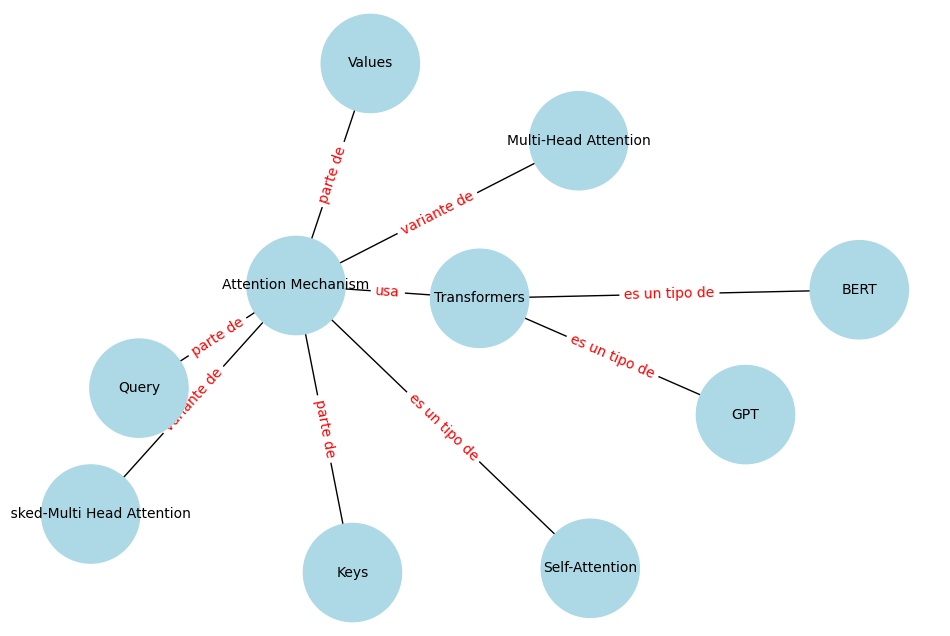

In [ ]:
# Creando un grafo de conocimiento basado en el texto sobre mecanismos de atención en IA

# Crear un nuevo grafo dirigido
G_attention = nx.DiGraph()

# Añadir nodos (Entidades clave)
entities = [
    "Attention Mechanism", "Self-Attention", "Query", "Keys", "Values",
    "Multi-Head Attention", "Masked-Multi Head Attention", "Transformers", "BERT", "GPT"
]
for entity in entities:
    G_attention.add_node(entity, node_color='lightblue')

# Añadir aristas (Relaciones)
relations = [
    ("Self-Attention", "Attention Mechanism", 'es un tipo de'),
    ("Query", "Attention Mechanism", 'parte de'),
    ("Keys", "Attention Mechanism", 'parte de'),
    ("Values", "Attention Mechanism", 'parte de'),
    ("Multi-Head Attention", "Attention Mechanism", 'variante de'),
    ("Masked-Multi Head Attention", "Attention Mechanism", 'variante de'),
    ("Transformers", "Attention Mechanism", 'usa'),
    ("BERT", "Transformers", 'es un tipo de'),
    ("GPT", "Transformers", 'es un tipo de')
]
for src, dst, rel in relations:
    G_attention.add_edge(src, dst, relationship=rel)

# Dibujar el grafo
pos_attention = nx.spring_layout(G_attention)  # Posicionamiento de los nodos
plt.figure(figsize=(12, 8))

# Dibujar nodos
nx.draw_networkx_nodes(G_attention, pos_attention, node_size=5000, node_color=[G_attention.nodes[n]['node_color'] for n in G_attention.nodes])

# Dibujar aristas
nx.draw_networkx_edges(G_attention, pos_attention, arrowstyle='->', arrowsize=20)

# Etiquetas para los nodos
nx.draw_networkx_labels(G_attention, pos_attention, font_size=10, font_family='sans-serif')

# Etiquetas para las aristas
edge_labels_attention = nx.get_edge_attributes(G_attention, 'relationship')
nx.draw_networkx_edge_labels(G_attention, pos_attention, edge_labels=edge_labels_attention, font_color='red')

plt.axis('off')
plt.show()


NetworkXError: Node 'Mecanismo de Atención' has no position.

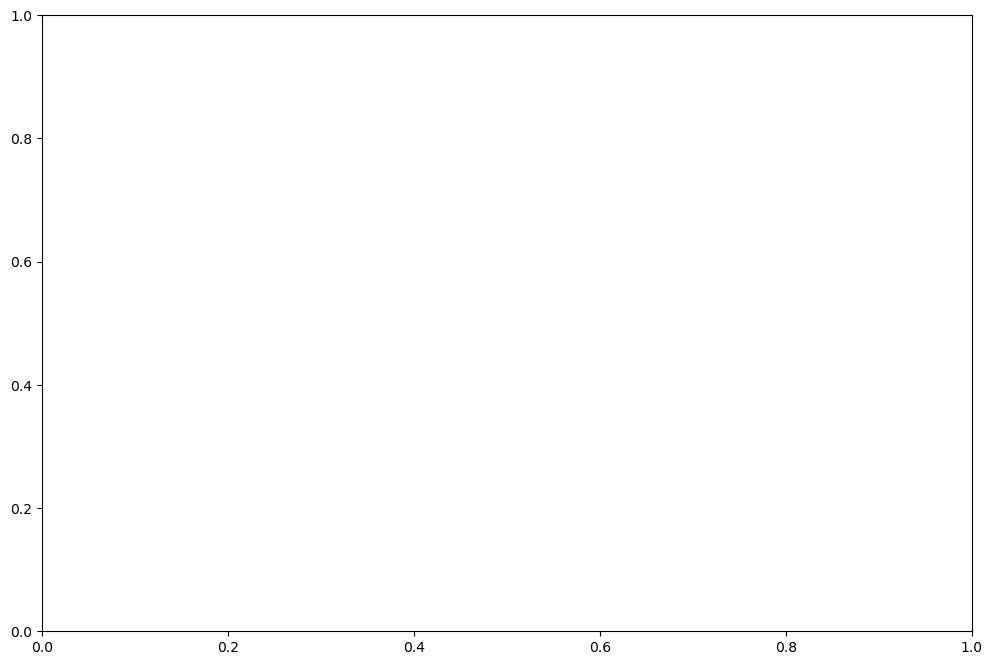

In [ ]:
# Traduciendo los nombres de los nodos al español para el grafo

# Nombres de nodos en español
translations = {
    "Attention Mechanism": "Mecanismo de Atención",
    "Self-Attention": "Auto-Atención",
    "Query": "Consulta",
    "Keys": "Llaves",
    "Values": "Valores",
    "Multi-Head Attention": "Atención Multi-Cabeza",
    "Masked-Multi Head Attention": "Atención Multi-Cabeza Enmascarada",
    "Transformers": "Transformadores",
    "BERT": "BERT",
    "GPT": "GPT"
}

# Actualizar los nombres de los nodos en el grafo
G_attention_translated = nx.relabel_nodes(G_attention, translations)

# Dibujar el grafo con nombres en español
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_attention_translated, pos_attention, node_size=5000, node_color=[G_attention_translated.nodes[n]['node_color'] for n in G_attention_translated.nodes])
nx.draw_networkx_edges(G_attention_translated, pos_attention, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G_attention_translated, pos_attention, font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G_attention_translated, pos_attention, edge_labels=edge_labels_attention, font_color='red')
plt.axis('off')
plt.show()


KeyError: 'Self-Attention'

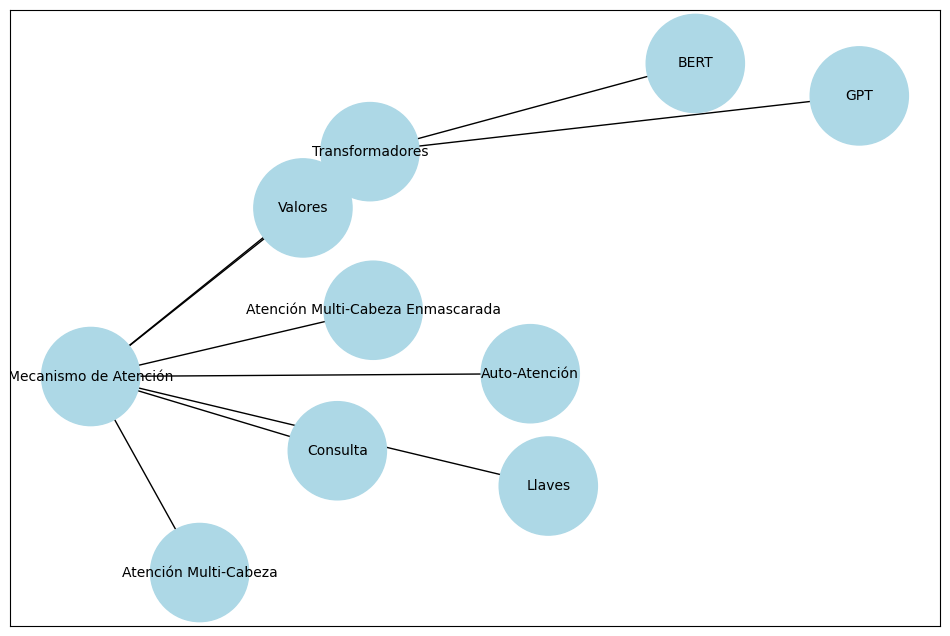

In [ ]:
# Recalculando las posiciones de los nodos para el grafo con nombres en español
pos_attention_translated = nx.spring_layout(G_attention_translated)

# Dibujar el grafo con nombres en español
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_attention_translated, pos_attention_translated, node_size=5000, node_color=[G_attention_translated.nodes[n]['node_color'] for n in G_attention_translated.nodes])
nx.draw_networkx_edges(G_attention_translated, pos_attention_translated, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G_attention_translated, pos_attention_translated, font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G_attention_translated, pos_attention_translated, edge_labels=edge_labels_attention, font_color='red')
plt.axis('off')
plt.show()


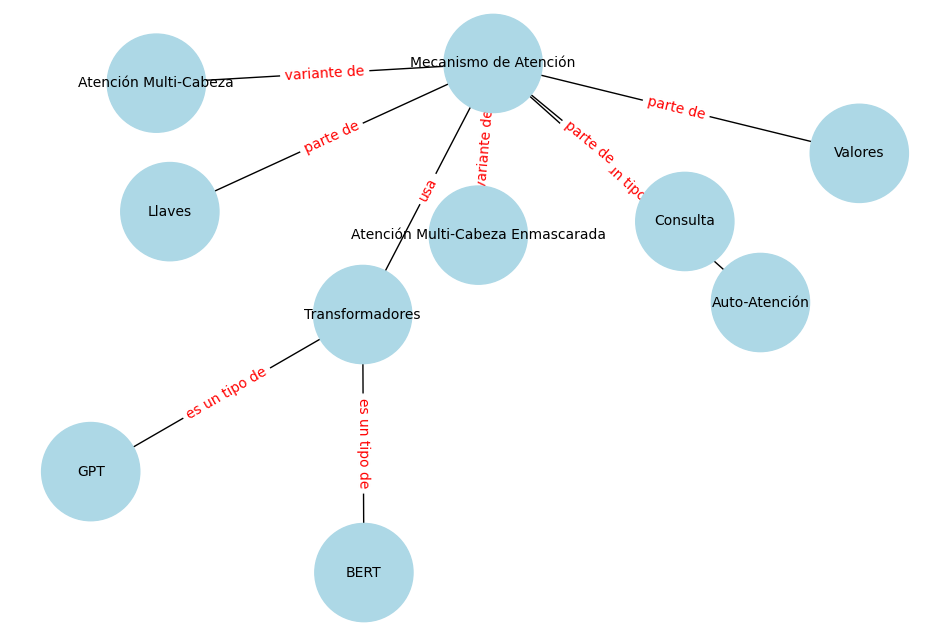

In [ ]:
# Traduciendo las etiquetas de las aristas al español
translated_edge_labels = {
    (translations[src], translations[dst]): rel for (src, dst), rel in edge_labels_attention.items()
}

# Dibujar el grafo con nombres y etiquetas de aristas en español
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G_attention_translated, pos_attention_translated, node_size=5000, node_color=[G_attention_translated.nodes[n]['node_color'] for n in G_attention_translated.nodes])
nx.draw_networkx_edges(G_attention_translated, pos_attention_translated, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G_attention_translated, pos_attention_translated, font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G_attention_translated, pos_attention_translated, edge_labels=translated_edge_labels, font_color='red')
plt.axis('off')
plt.show()


Esto es mejor que lo anterior.

Provemos ahora con una grafica 3D.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3D")
pos = nx.spring_layout(G, k=2.5, dim=3)

nodes = np.array([pos[v] for v in sorted(G) if v != f])
center_node = np.array([pos[v] for v in sorted(G) if v == f])

edges = np.array([(pos[u], pos[v]) for u, v in G.edges() if v != f])
center_edges = np.array([(pos[u], pos[v]) for u, v in G.edges() if v == f])

ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

for link in edges:
    ax.plot(*link.T, color="grey", lw=0.5)
for link in center_edges:
    ax.plot(*link.T, color="red", lw=0.5)

for v in sorted(G):
    ax.text(*pos[v].T, s=v)
for u, v in G.edges():
    attr = nx.get_edge_attributes(G, "relation")[(u, v)]
    ax.text(*((pos[])))